In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

In [16]:
data_path = '/content/drive/MyDrive/Fundamentals_of_ML/HW1/'

columns = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue',
    'OD280/OD315 of diluted wines', 'Proline'
]

wine_df = pd.read_csv(data_path + 'wine.data', header=None, names=columns)

pd.set_option('display.max_rows', None)

wine_df

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.040,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.050,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.030,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.860,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.040,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.050,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.060,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.080,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.010,3.55,1045


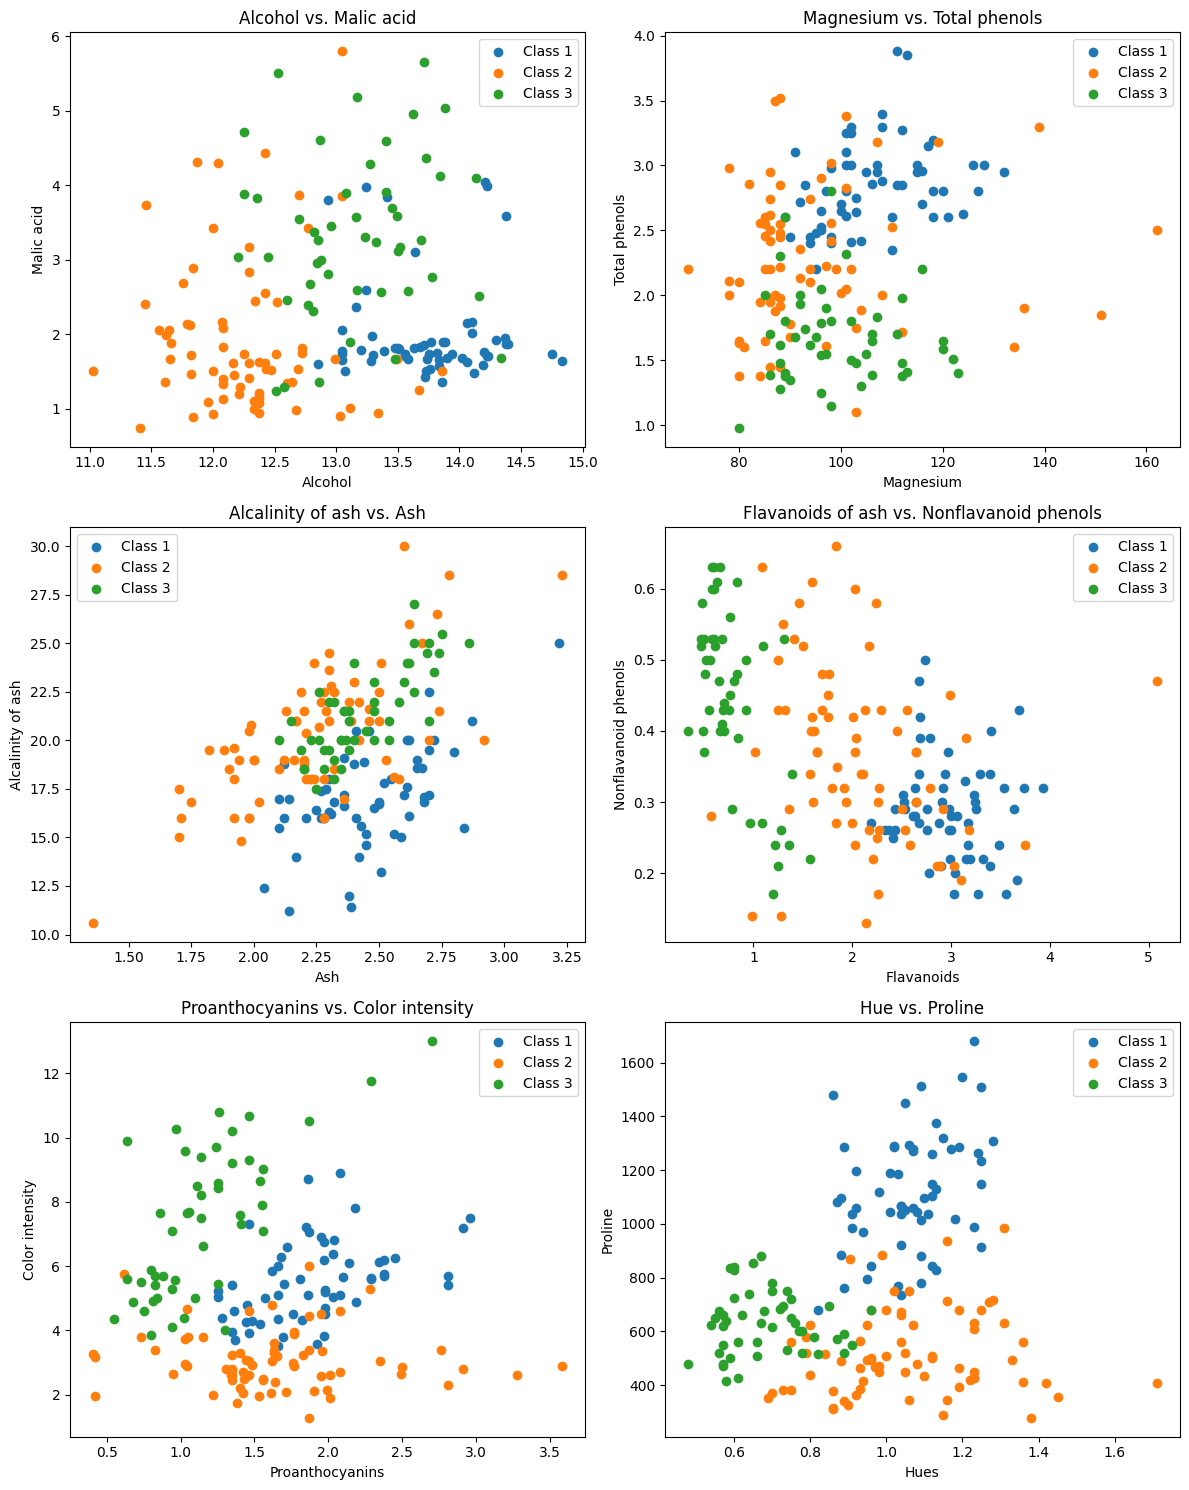

In [17]:
plt.figure(figsize=(12, 15))

plt.subplot(3, 2, 1)
for label in wine_df['Class label'].unique():
    subset = wine_df[wine_df['Class label'] == label]
    plt.scatter(subset['Alcohol'], subset['Malic acid'], label=f'Class {label}')
plt.xlabel('Alcohol')
plt.ylabel('Malic acid')
plt.title('Alcohol vs. Malic acid')
plt.legend()

plt.subplot(3, 2, 2)
for label in wine_df['Class label'].unique():
    subset = wine_df[wine_df['Class label'] == label]
    plt.scatter(subset['Magnesium'], subset['Total phenols'], label=f'Class {label}')
plt.xlabel('Magnesium')
plt.ylabel('Total phenols')
plt.title('Magnesium vs. Total phenols')
plt.legend()

plt.subplot(3, 2, 3)
for label in wine_df['Class label'].unique():
    subset = wine_df[wine_df['Class label'] == label]
    plt.scatter(subset['Ash'], subset['Alcalinity of ash'], label=f'Class {label}')
plt.xlabel('Ash')
plt.ylabel('Alcalinity of ash')
plt.title('Alcalinity of ash vs. Ash')
plt.legend()

plt.subplot(3, 2, 4)
for label in wine_df['Class label'].unique():
    subset = wine_df[wine_df['Class label'] == label]
    plt.scatter(subset['Flavanoids'], subset['Nonflavanoid phenols'], label=f'Class {label}')
plt.xlabel('Flavanoids')
plt.ylabel('Nonflavanoid phenols')
plt.title('Flavanoids of ash vs. Nonflavanoid phenols')
plt.legend()

plt.subplot(3, 2, 5)
for label in wine_df['Class label'].unique():
    subset = wine_df[wine_df['Class label'] == label]
    plt.scatter(subset['Proanthocyanins'], subset['Color intensity'], label=f'Class {label}')
plt.xlabel('Proanthocyanins')
plt.ylabel('Color intensity')
plt.title('Proanthocyanins vs. Color intensity')
plt.legend()

plt.subplot(3, 2, 6)
for label in wine_df['Class label'].unique():
    subset = wine_df[wine_df['Class label'] == label]
    plt.scatter(subset['Hue'], subset['Proline'], label=f'Class {label}')
plt.xlabel('Hues')
plt.ylabel('Proline')
plt.title('Hue vs. Proline')
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
# check for any missing values
missing = wine_df.isnull().sum()
print("Missing values in each column:\n", missing)


Missing values in each column:
 Class label                     0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64


In [19]:
X = wine_df.drop('Class label', axis=1)
y = wine_df['Class label']

# standard scaling (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


In [20]:
# split the scaled features and target labels
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=22, stratify=y
)

In [21]:
def calculate_euclidean_distance(vector_a, vector_b):
    sum_of_squared_differences = 0.0
    for index in range(len(vector_a)):
        difference = vector_a[index] - vector_b[index]
        squared_difference = difference ** 2
        sum_of_squared_differences += squared_difference
        euclidean_distance = np.sqrt(sum_of_squared_differences)
    return euclidean_distance

def calculate_manhattan_distance(vector_a, vector_b):
    total_absolute_difference = 0.0
    for index in range(len(vector_a)):
        absolute_difference = abs(vector_a[index] - vector_b[index])
        total_absolute_difference += absolute_difference
    return total_absolute_difference


In [22]:
def kNN_predict(training_features, training_labels, testing_features, k_value=3, distance_metric="euclidean"):
    predicted_labels = []
    training_labels_array = np.array(training_labels)

    for test_index in range(len(testing_features)):
        current_test_sample = testing_features[test_index]
        distances_for_current_sample = []

        for train_index in range(len(training_features)):
            current_training_sample = training_features[train_index]
            #distance metrics
            if distance_metric == "euclidean":
                current_distance = calculate_euclidean_distance(current_test_sample, current_training_sample)
            elif distance_metric == "manhattan":
                current_distance = calculate_manhattan_distance(current_test_sample, current_training_sample)

            distances_for_current_sample.append(current_distance)

        distances_for_current_sample = np.array(distances_for_current_sample)
        sorted_indices = np.argsort(distances_for_current_sample) # sort distances
        nearest_neighbor_indices = sorted_indices[:k_value] # take the k nearest neighbours

        neighbor_labels = training_labels_array[nearest_neighbor_indices]
        neighbor_distances = distances_for_current_sample[nearest_neighbor_indices]
        adjusted_labels = [label - 1 for label in neighbor_labels]

        label_counts = np.bincount(adjusted_labels)
        max_count = np.max(label_counts)

        if np.sum(label_counts == max_count) == 1:
            # if there is no draw
            majority_vote_index = np.argmax(label_counts)
        else:
            # if there is draw use weights
            weights = 1 / (neighbor_distances + 1e-8)
            label_weights = np.zeros(np.max(adjusted_labels) + 1)
            for i, label in enumerate(adjusted_labels):
                label_weights[label] += weights[i]
            majority_vote_index = np.argmax(label_weights)

        predicted_label = majority_vote_index + 1
        predicted_labels.append(predicted_label)

    return np.array(predicted_labels)


In [23]:
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
distance_metrics = ["euclidean", "manhattan"]
accuracy_results = {metric: [] for metric in distance_metrics}

for metric in distance_metrics:
    print(f"\nEvaluating using {metric.capitalize()} Distance:\n" + "-"*40)
    for k in k_values:
        predictions = kNN_predict(X_train, y_train, X_test, k_value=k, distance_metric=metric)
        accuracy = accuracy_score(y_test, predictions)
        accuracy_results[metric].append(accuracy)
        print(f"K = {k}: Accuracy = {accuracy:.4f}")



Evaluating using Euclidean Distance:
----------------------------------------
K = 1: Accuracy = 0.9444
K = 2: Accuracy = 0.9444
K = 3: Accuracy = 0.9167
K = 4: Accuracy = 0.9444
K = 5: Accuracy = 0.9722
K = 6: Accuracy = 0.9722
K = 7: Accuracy = 0.9722
K = 8: Accuracy = 0.9444
K = 9: Accuracy = 0.9722
K = 10: Accuracy = 0.9444
K = 11: Accuracy = 0.9722
K = 12: Accuracy = 0.9722
K = 13: Accuracy = 0.9444
K = 14: Accuracy = 0.9722
K = 15: Accuracy = 0.9444
K = 16: Accuracy = 0.9722
K = 17: Accuracy = 0.9722
K = 18: Accuracy = 0.9722
K = 19: Accuracy = 0.9722
K = 20: Accuracy = 0.9722

Evaluating using Manhattan Distance:
----------------------------------------
K = 1: Accuracy = 0.9722
K = 2: Accuracy = 0.9722
K = 3: Accuracy = 0.9722
K = 4: Accuracy = 0.9722
K = 5: Accuracy = 0.9444
K = 6: Accuracy = 0.9722
K = 7: Accuracy = 0.9722
K = 8: Accuracy = 1.0000
K = 9: Accuracy = 0.9722
K = 10: Accuracy = 0.9722
K = 11: Accuracy = 0.9444
K = 12: Accuracy = 0.9444
K = 13: Accuracy = 0.9722
K 

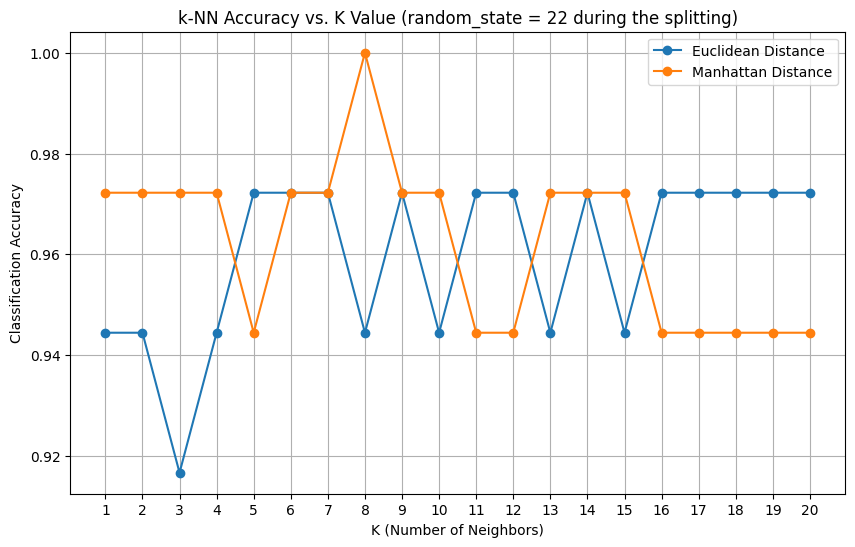

In [26]:
plt.figure(figsize=(10, 6))
for metric in distance_metrics:
    plt.plot(k_values, accuracy_results[metric], marker='o', label=f"{metric.capitalize()} Distance")
plt.title("k-NN Accuracy vs. K Value (random_state = 22 during the splitting)")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Classification Accuracy")
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


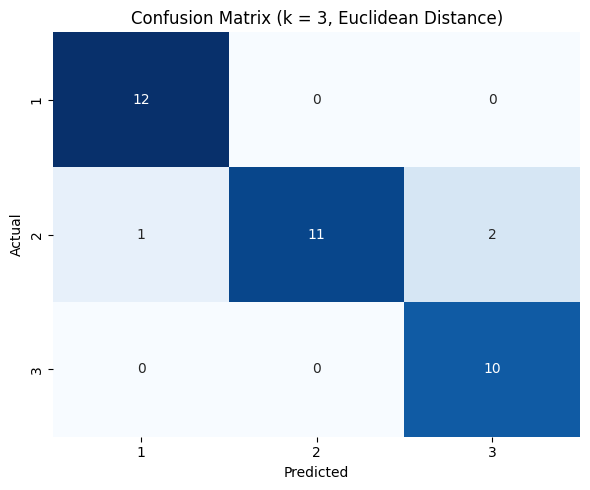

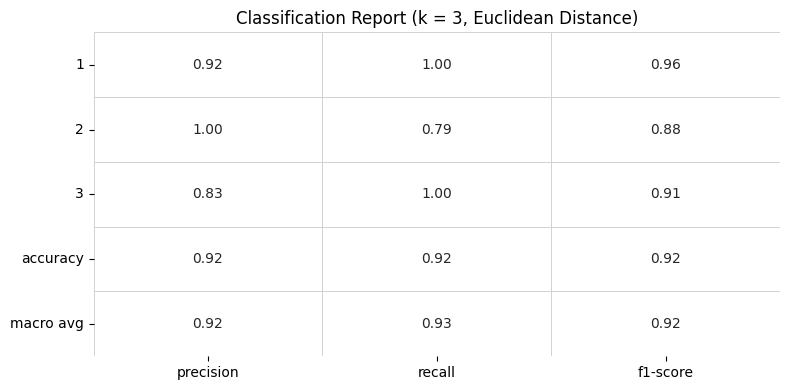

In [27]:
selected_k = 3
selected_metric = "euclidean"

final_predictions = kNN_predict(X_train, y_train, X_test, k_value=selected_k, distance_metric=selected_metric)

conf_mat = confusion_matrix(y_test, final_predictions)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title(f"Confusion Matrix (k = {selected_k}, {selected_metric.capitalize()} Distance)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("confusion_matrix_output.png", dpi=300)

report = classification_report(y_test, final_predictions, output_dict=True)
report_df = pd.DataFrame(report).transpose()

flat_white = ListedColormap(['#FFFFFF'])

plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap=flat_white, cbar=False,
            linewidths=0.5, linecolor='lightgrey')
plt.title(f"Classification Report (k = {selected_k}, {selected_metric.capitalize()} Distance)")
plt.tight_layout()
plt.savefig("classification_report_output.png", dpi=300)
